print('Scores for Random Forest:')
print(classification_report(y_test, pred_test_rf)) 
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, pred_test_rf)))## Business Understanding 
Purpose: Ask relevant questions and define objectives for the problem that needs to be tackled

## Background
In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative.

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project. A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

### Final Deliverables


* Well designed presentation for non-technical stakeholders outlining findings and recommendations, as well as future work (10min presentation).
* Jupyter notebook following Data Science Lifecycle

### Things to think about

* Try different (at least 3) machine learning algorithms to check which performs best on the problem at hand
* What would be right performance metric: Precision, recall, accuracy, F1 score, or something else? (Check TPR?)
* Check for data imbalance


## Key Question 

We currently hold a task by Kickstarter to come up with a model to predict in a first step whether is project is likely to be successful, given certain project parameters. In a second step (out of scope), Kickstarter would like to be able to provide a good goal recommendation for creators( for example using staff picks etc.)

* Given certain project parameters, __is a campaign likely to succeed or fail?__ --> classification
* what would e a __reasonable goal reccomendation for creators__ --> regression



## Feature Glossary

Features included in model

* Target : state
*
*
*

## Dataset Description

- **backers_count**: Amount of people who backed this project
- **category**: 
- **country**: Country the project owner lives in
- **created_at**: Date when the prjoect was created
- **currency**: Currency of the country where the owner lives in
- **currency_trailing_code**: 
- **current_currency**: 
- **deadline**: Date until the project can be backed
- **disable_communication**: If the communication with owner was disabled or not
- **fx_rate**: Foreign exchange rate
- **goal**: Project is only funded when the goal amount is reached
- **launched_at**: Date when the project was launced
- **spotlight**: Highlighted projects (available to all projects that are successfully funded)
- **staff_pick**: Promissing project picked by Kickstarter employees
- **state**: Project status
- **state_changed_at**: Date when state changed the last time
- **static_usd_rate**: static USD Convergen rate at time
- **usd_pledged**: pledge amount converted to USD using Static_usd_rate


## Dataset New/Added Feature Description

- **campaign_days**: Days the Project was live
- **pledged_over**: Amount Pledged surpassing the Goal(with converted pledge amount) 
- **pre_launched_days**: Days before the Project was launched


## Target Metric

* F1 score — Since creators wouldn’t want the model to predict too many success that will turn out to be a failure (minimize False Positives) and backers would want to make sure the model capture as many success as possible (minimize False Negatives), I want a balance between precision and recall

## Outcome / Reccomendations
*
*
*

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import scipy as sc
from scipy.stats import kstest
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

#Data mining
import os, glob

#Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import imblearn # add imblearn to requirements text
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


## Predictive Modelling : Classification ("state")
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
#from xgboost import XGBClassifier

# What to do? (for me)

* find a way to implement pipelines for skalierung
* pipelines for classifier
* maybe a new feature?

## Dashboard
Purpose : Define global variables and visuals

In [2]:
random_state = 100
test_size = 0.3
sns.set(style = "ticks")
scoring = "f1"

## Data Mining

In [3]:
# Import multiple Kickstarter csv files and merge into one dataframe

path = "data-2"
all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
merged_df = pd.concat(all_df, ignore_index=True, sort=True)

In [4]:
#
# merged_df = pd.read_csv('data-2/Kickstarter_all.csv') ### brauche ich wenn ich den Anderen Kram nicht laufen lassen will

## Inspection and Data Cleaning

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  file                      209222 non-null  o

In [6]:
#save the merged data as .zip
#compression_opts = dict(method='zip', archive_name='out.csv')  
#merged_df.to_csv('out.zip', index=False, compression=compression_opts)

In [7]:
# Display shape of "data"
merged_df.shape

(209222, 38)

In [8]:
merged_df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,...,babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,...,record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,...,the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,...,help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


In [9]:
merged_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'file', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [10]:
merged_df.groupby('state').count()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,profile,slug,source_url,spotlight,staff_pick,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
state,,,,,,,,,,,,,,,,,,,,,
canceled,8624,8618,8624,8624,8624,8624,8624,8624,8624,8624,...,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624
failed,75199,75197,75199,75199,75199,75199,75199,75199,75199,75199,...,75199,75199,75199,75199,75199,75199,75199,75199,75199,75199
live,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,...,7311,7311,7311,7311,7311,7311,7311,7311,7311,6869
successful,117465,117465,117465,117465,117465,117465,117465,117465,117465,117465,...,117465,117465,117465,117465,117465,117465,117465,117465,117465,117427
suspended,623,623,623,623,623,623,623,623,623,623,...,623,623,623,623,623,623,623,623,623,623


In [11]:
pd.isnull(merged_df).sum()

backers_count                    0
blurb                            8
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
file                             0
friends                     208922
fx_rate                          0
goal                             0
id                               0
is_backing                  208922
is_starrable                     0
is_starred                  208922
launched_at                      0
location                       226
name                             0
permissions                 208922
photo                            0
pledged                          0
profile                          0
slug                

## Data Handling

In [12]:
# create a dataset for Inspection
final = merged_df.copy()

### Dropping Data - First Wave

In [13]:
drop_list = []

#### Dropping features with missing values

In [14]:
drop_missing_values = ['blurb', 'friends', 'is_backing', 'is_starred', 'permissions', 'usd_type', 'location']
drop_list.extend(drop_missing_values)
final = final.drop(drop_missing_values, axis = 1)


#### Dropping useless features 

In [15]:
drop_useless_features = ['creator', 'currency_symbol', 'name', 'photo', 'profile', 'slug','urls', 'file']
drop_list.extend(drop_useless_features)
final = final.drop(drop_useless_features, axis = 1)

#### Dropping redundant features

In [16]:
drop_redundant_features = ['pledged', 'usd_pledged']
drop_list.extend(drop_redundant_features)
final = final.drop(drop_redundant_features, axis = 1)

In [17]:
drop_list

['blurb',
 'friends',
 'is_backing',
 'is_starred',
 'permissions',
 'usd_type',
 'location',
 'creator',
 'currency_symbol',
 'name',
 'photo',
 'profile',
 'slug',
 'urls',
 'file',
 'pledged',
 'usd_pledged']

#### Replacing features

In [18]:
# Extract category_sub from "category"
final["sub_category"] = [final.category[i].split('"')[5] for i in final.index]
final["sub_category"] = final["sub_category"].str.replace("%20", "_")

In [19]:
# Extract category from "source_url"
final["category"] = [final.source_url[i].split("/")[5] for i in final.index]
final["category"] = final["category"].str.replace("%20", "_")

In [20]:
modified_list = ['category','state']

In [21]:
#replace successful and failed with 1 and 0
final.state.replace(['successful','failed'], [1,0],inplace=True)
final = final.query('state == [1,0]')
final.state = final.state.astype(int)

#Changing types 

final.is_starrable = final.is_starrable.astype(int)
final.disable_communication = final.disable_communication.astype(int)
final.currency_trailing_code = final.currency_trailing_code.astype(int)
final.staff_pick = final.staff_pick.astype(int)
final.spotlight = final.spotlight.astype(int)
#drop live,susspended,cancelled
#final = final[final['state'] == [1,0]]


### Time conversions



In [22]:
modified_list.extend(['launched_at', 'deadline', 'created_at', 'state_changed_at'])         

In [23]:
#converting unix time 
final.launched_at = pd.to_datetime(final.launched_at,unit='s',infer_datetime_format=True)
final.deadline = pd.to_datetime(final.deadline,unit='s',infer_datetime_format=True)
final.created_at = pd.to_datetime(final.created_at,unit='s',infer_datetime_format=True)
final.state_changed_at = pd.to_datetime(final.state_changed_at,unit='s',infer_datetime_format=True)

In [24]:
#Create month and year
final['launched_at_yr'] = [date.year for date in final['launched_at']]
final['launched_at_mth'] = [date.month for date in final['launched_at']]

### Writing df changes

In [25]:
feature_list = list(merged_df.columns)

df_features = pd.DataFrame(feature_list,columns =['features'])
df_features['dropped'] = df_features.features.isin(drop_list)
df_features['drop_reason'] = ['missing_values' if x in drop_missing_values \
                              else 'useless' if x in drop_useless_features \
                              else 'redundant' if x in drop_redundant_features \
                              else 'None' for x in df_features['features']]
df_features['modified'] = df_features.features.isin(modified_list)

In [26]:
df_features

,features,dropped,drop_reason,modified
0,backers_count,False,None,False
1,blurb,True,missing_values,False
2,category,False,None,True
3,converted_pledged_amount,False,None,False
4,country,False,None,False
5,created_at,False,None,True
6,creator,True,useless,False
7,currency,False,None,False
8,currency_symbol,True,useless,False
9,currency_trailing_code,False,None,False


# Data Exploration
Purpose: we gotta form a hypotheses / story about our defined problem by visually analyzing the data

In [27]:
#new dataset for exploration
data_exp = final.copy()

In [28]:
# Seperate continious vs. categorical variables
data_cat_col = ['category','country','sub_category','country','currency','current_currency','is_starrable','disable_communication','state']
data_cont_col = [x for x in final if x not in data_cat_col]
data_cat = final[data_cat_col]
data_cont = final[data_cont_col]

In [29]:
# Check if scaling is needed ( we can do this by looking at the .skew()
final.skew()

backers_count               41.997986
converted_pledged_amount    34.422017
currency_trailing_code      -1.671302
disable_communication        0.000000
fx_rate                     -2.244813
goal                        73.476994
id                          -0.002373
is_starrable                 0.000000
spotlight                   -0.449712
staff_pick                   2.137329
state                       -0.449712
static_usd_rate             -1.144525
launched_at_yr              -0.506230
launched_at_mth             -0.028777
dtype: float64

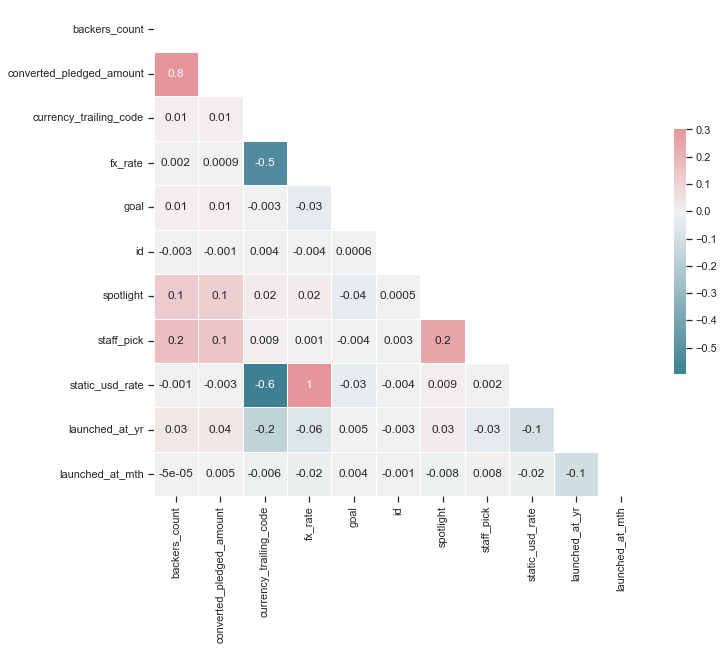

In [30]:
#Plot correlation heatmap for continious values
mask = np.triu(np.ones_like(data_cont.corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data_cont.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1g");


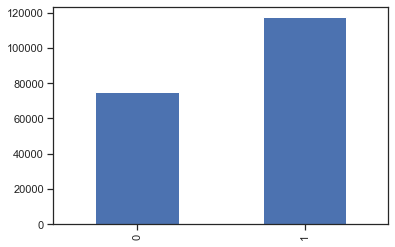

In [31]:
#Plot a histogram of our Target 'state' and see if it needs scaling for future work
data_exp['state'].value_counts(ascending=True).plot(kind='bar');

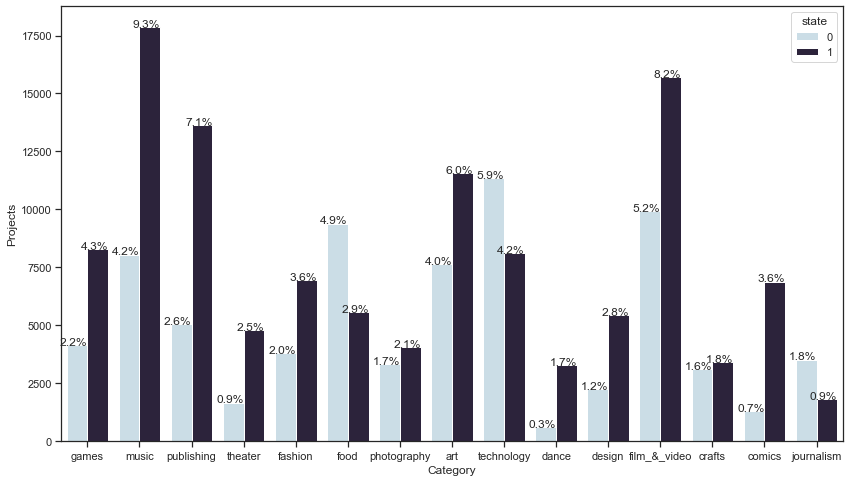

In [32]:
plt.figure(figsize=(14,8))
total = float(len(data_exp))

ax = sns.countplot(x='category', hue='state',palette="ch:s=.25,rot=-.25", data=data_exp)
ax.set_xlabel("Category")
ax.set_ylabel(r"Projects")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

plt.figure(figsize=(14,10))

sns.countplot(x='category', hue='state', data=data_exp);

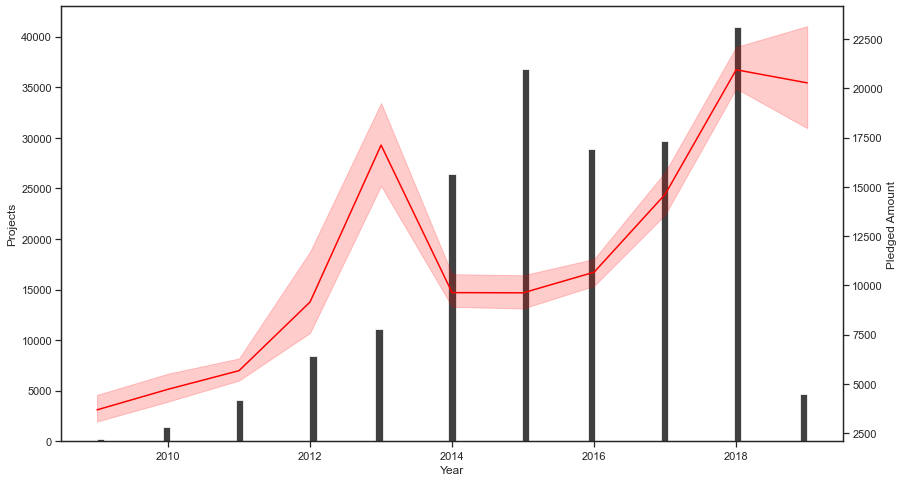

In [33]:
fig=plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
#width = [4,2,3,1,5,3,5,7,8,7]
# changes here
ax1 = sns.histplot(x=data_exp.launched_at_yr, data=data_exp,color="black",ax=ax1)
sns.lineplot(x=data_exp.launched_at_yr, y=data_exp.converted_pledged_amount,data=data_exp,color="red", ax=ax2)

ax1.set_xlabel("Year")
ax1.set_ylabel(r"Projects")
ax2.set_ylabel(r"Pledged Amount")


# and here
#plt.xticks(data_exp.index, rotation=60)
plt.show()

# Feature Engineering

In [34]:
new_features_list = ['pledged_over', 'campaign_days', 'pre_launched_days', 'launched_at_yr','launched_at_mth', 'goal_converted','goal_converted_log','backers_count_log']

In [35]:
#create new features
final['pledged_over'] = final.converted_pledged_amount - final.goal 
final['campaign_days'] = ((final.deadline - final.launched_at)/ np.timedelta64(1, 'h')).astype(int)
final['pre_launched_days'] = ((final.launched_at - final.created_at)/ np.timedelta64(1, 'h')).astype(int)
final['goal_converted'] = final["goal"] * final["static_usd_rate"]




In [36]:
#use log on stuff
final['converted_pledged_amount_log'] = np.log(final['converted_pledged_amount']+1)
final['backers_count_log'] = np.log(final['backers_count']+1)
final['goal_converted_log'] = np.log(final['goal_converted']+1)

In [37]:
#second drop of features :
drop_missing_values2 = ['backers_count', 'created_at', 'currency', 'currency_trailing_code', 'current_currency',
                        'deadline','disable_communication','fx_rate','id','launched_at','source_url','state_changed_at',
                        'static_usd_rate','sub_category','launched_at_yr','pledged_over','goal',
                        'backers_count_log','goal_converted','is_starrable','converted_pledged_amount','converted_pledged_amount_log','pre_launched_days','spotlight']
final_pre = final.drop(drop_missing_values2, axis=1)


In [38]:
final_pre.head()

,category,country,staff_pick,state,launched_at_mth,campaign_days,goal_converted_log
1,games,US,0,1,8,720,6.908755
2,music,US,0,1,5,720,9.615872
3,games,GB,0,0,1,1439,9.406043
4,publishing,US,0,1,12,720,7.937732
5,music,US,0,1,4,720,8.160804


In [39]:
dummy_df = final_pre.copy()

In [40]:
category_dummies = pd.get_dummies(dummy_df['category'], prefix='cat', drop_first=True) 
country_dummies = pd.get_dummies(dummy_df['country'], prefix='country', drop_first=True)
dummy_df = dummy_df.drop(['category','country'], axis=1) 
dummy_df = pd.concat([dummy_df, category_dummies, country_dummies], axis=1) 

In [41]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 1 to 209221
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   staff_pick          192664 non-null  int64  
 1   state               192664 non-null  int64  
 2   launched_at_mth     192664 non-null  int64  
 3   campaign_days       192664 non-null  int64  
 4   goal_converted_log  192664 non-null  float64
 5   cat_comics          192664 non-null  uint8  
 6   cat_crafts          192664 non-null  uint8  
 7   cat_dance           192664 non-null  uint8  
 8   cat_design          192664 non-null  uint8  
 9   cat_fashion         192664 non-null  uint8  
 10  cat_film_&_video    192664 non-null  uint8  
 11  cat_food            192664 non-null  uint8  
 12  cat_games           192664 non-null  uint8  
 13  cat_journalism      192664 non-null  uint8  
 14  cat_music           192664 non-null  uint8  
 15  cat_photography     192664 non-nul

# Preprocessing (Train/Test Split and Basemodel) with Dummy Variables
In order to apply modelling on different dataset types, we should consider a nice way to do the splits.




In [42]:
X = dummy_df.drop(["state"], axis=1)
y = dummy_df["state"]

In [43]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True,
                                                   stratify=y)

In [44]:
dum_clf = DummyClassifier(strategy='constant',constant=1).fit(X_train,y_train)
y_pred_dum_clf = dum_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred_dum_clf))
print(classification_report(y_test,y_pred_dum_clf))



[[    0 22560]
 [    0 35240]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22560
           1       0.61      1.00      0.76     35240

    accuracy                           0.61     57800
   macro avg       0.30      0.50      0.38     57800
weighted avg       0.37      0.61      0.46     57800



In [45]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, 
                               random_state=random_state,
                               max_depth=5,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)


def random_forest(X_train, y_train, X_test, Y_test, rfc):
    rfc.fit(X_train, y_train)
    pred_train = rfc.predict(X_train)
    pred_test = rfc.predict(X_test)
    print(f1_score(y_test, pred_test))
    print(classification_report(y_test, pred_test)) 
    print(confusion_matrix(y_test, pred_test))
    sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, cmap='YlGn', fmt='d');
    return pred_train, pred_test


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7886648943145648
              precision    recall  f1-score   support

           0       0.76      0.31      0.44     22560
           1       0.68      0.94      0.79     35240

    accuracy                           0.69     57800
   macro avg       0.72      0.62      0.61     57800
weighted avg       0.71      0.69      0.65     57800

[[ 6996 15564]
 [ 2163 33077]]


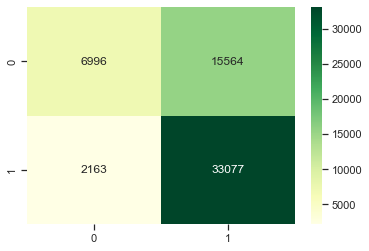

In [46]:
rfcmodel = random_forest(X_train, y_train, X_test, y_test, rfc)

# Preprocessing (Train/Test Split and Basemodel) with Pipeline and Columntransformer
In order to apply modelling on different dataset types, we should consider a nice way to do the splits.



In [47]:
#define predictors and target variable X,y
X = final_pre.drop(["state"], axis=1)
y = final_pre["state"]

In [48]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True,
                                                   stratify=None)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [49]:
# create a dummy classifier model as Basemodel
dum_clf = DummyClassifier(strategy='constant',constant=1).fit(X_train,y_train)
y_pred_dum_clf = dum_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred_dum_clf))
print(classification_report(y_test,y_pred_dum_clf))


[[    0 22691]
 [    0 35109]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22691
           1       0.61      1.00      0.76     35109

    accuracy                           0.61     57800
   macro avg       0.30      0.50      0.38     57800
weighted avg       0.37      0.61      0.46     57800



In [50]:
X_train.head()

,category,country,staff_pick,launched_at_mth,campaign_days,goal_converted_log
96786,art,US,0,9,720,6.111467
85840,art,US,0,3,852,8.006701
35560,technology,US,0,11,720,9.903538
71170,art,US,0,12,1080,5.860786
49633,dance,GB,0,6,701,8.945829


ct = ColumnTransformer([('Category', OneHotEncoder(), [0])], remainder = 'passthrough')

X = ct.fit_transform(X)


___Pipeline for preprocessing and feature scaling___

In [51]:
# Creating a list for categorical predictors/features (used in scaling with preprocessing pipeline)
cat_features = list(final_pre.columns[final_pre.dtypes==object])
cat_features

['category', 'country']

In [52]:
# Creating a list for numerical predictors/features (used in scaling with preprocessing pipeline)
num_features = list(final_pre.columns[final_pre.dtypes!=object])
num_features.remove('state')
num_features

['staff_pick', 'launched_at_mth', 'campaign_days', 'goal_converted_log']

In [53]:
#Pipeline for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
            ('imputer_num', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
            ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

#Finish Pipeline

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])




In [54]:
#As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). 
#Only then can you use them to transform the training set and the test set (and new data).
#X_train = preprocessor.fit_transform(X_train)
#X_test = preprocessor.transform(X_test)


# Predictive Modelling
Purpose: Train machine learning models (supervised), evaluate their performance and use them to make predictions

___Pipelines for Models___

___Logistic Regression___

In [58]:
pipeline_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [78]:
# Logistic regression (using pipeline, making predictions using cross validation and probabilities)
pipeline_logreg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['staff_pick',
                                                   'launched_at_mth',
                                                   'campaign_days',
                                                   'goal_converted_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [79]:
y_pred_logreg = pipeline_logreg.predict(X_test)

Scores for logistic regression:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59     22691
           1       0.73      0.84      0.78     35109

    accuracy                           0.71     57800
   macro avg       0.70      0.68      0.69     57800
weighted avg       0.71      0.71      0.71     57800

Confusion Matrix: 
[[11898 10793]
 [ 5686 29423]]


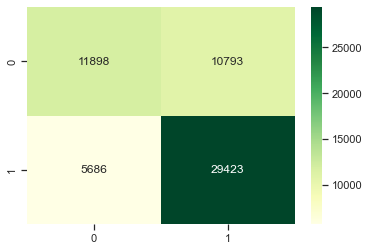

In [87]:
print('Scores for logistic regression:')
print(classification_report(y_test, y_pred_logreg)) 
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_logreg)))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, cmap='YlGn', fmt='d');

-------------------------------------------------------------------

___Support Vector Machine___

In [101]:
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(kernel='rbf'))
])

In [102]:

pipeline_svc.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['staff_pick',
                                                   'launched_at_mth',
                                                   'campaign_days',
                                                   'goal_converted_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [103]:
y_pred_svc = pipeline_svc.predict(X_test)

In [104]:
print('Scores for Support Vector Machine:')
print(classification_report(y_test, y_pred_svc)) 
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_svc)))

Scores for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.70      0.51      0.59     22691
           1       0.73      0.86      0.79     35109

    accuracy                           0.72     57800
   macro avg       0.71      0.68      0.69     57800
weighted avg       0.72      0.72      0.71     57800

Confusion Matrix: 
[[11591 11100]
 [ 5013 30096]]


___Grid Search for SVM___

# Tune model with GridSearchCV (find optimal C)
param_grid = {'svc__C': [500, 1000, 2000],
              'svc__gamma': [0.1, 0.5, 1],
             'svc__kernel': ["rbf"]} # ["linear", "rbf", "poly"] Others: kernel, degree (only for poly)
grid_svc = GridSearchCV(pipeline_svc, param_grid, cv=5, scoring=scoring, 
                           verbose=4, n_jobs=-1)

In [64]:
#%time grid_svc.fit(X_train, y_train)

_____________________________

___Random Forest___

In [105]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100,
                              random_state=random_state,
                              max_depth=5,
                              max_features="sqrt",
                              n_jobs=-1))
])

In [106]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['staff_pick',
                                                   'launched_at_mth',
                                                   'campaign_days',
                                                   'goal_converted_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [110]:
pred_test_rf = pipeline_rf.predict(X_test)

In [111]:
print('Scores for Random Forest:')
print(classification_report(y_test, pred_test_rf)) 
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, pred_test_rf)))

Scores for Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.29      0.42     22691
           1       0.67      0.95      0.79     35109

    accuracy                           0.69     57800
   macro avg       0.73      0.62      0.61     57800
weighted avg       0.71      0.69      0.64     57800

Confusion Matrix: 
[[ 6605 16086]
 [ 1898 33211]]


In [123]:
# Defining hyperparameter space for grid-search
param_grid = {'rf___bootstrap': [True, False],
              'rf__max_depth': [3, 6, 10, None],
              'rf__max_features': ['auto', 'sqrt'],
              'rf__min_samples_leaf': [1, 3],
              'rf__min_samples_split': [2, 5],
              'rf__n_estimators': [10, 50, 200]} # Others: kernel, degree (only for poly)
grid_rf = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring=scoring, 
                           verbose=4, n_jobs=-1)

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


----------

__AdaBoost__


In [113]:
pipeline_ada= Pipeline([
    ('preprocessor', preprocessor),
    ('ada', AdaBoostClassifier())
])
    
pipeline_ada.fit(X_train,y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['staff_pick',
                                                   'launched_at_mth',
                                                   'campaign_days',
                                                   'goal_converted_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [114]:
y_pred_ada = pipeline_ada.predict(X_test)


In [115]:
print('Scores for Ada Boost:')
print(classification_report(y_test, y_pred_ada)) 
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_ada)))

Scores for Ada Boost:
              precision    recall  f1-score   support

           0       0.70      0.52      0.59     22691
           1       0.73      0.86      0.79     35109

    accuracy                           0.72     57800
   macro avg       0.72      0.69      0.69     57800
weighted avg       0.72      0.72      0.71     57800

Confusion Matrix: 
[[11691 11000]
 [ 5039 30070]]


------


___KNN Neighbours___

In [117]:
pipeline_knn= Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])
    
pipeline_knn.fit(X_train,y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['staff_pick',
                                                   'launched_at_mth',
                                                   'campaign_days',
                                                   'goal_converted_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [120]:
y_pred_knn = pipeline_knn.predict(X_test)

In [121]:
print('Scores for KNN:')
print(classification_report(y_test, y_pred_knn)) 
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_knn)))

Scores for KNN:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60     22691
           1       0.74      0.78      0.76     35109

    accuracy                           0.70     57800
   macro avg       0.68      0.68      0.68     57800
weighted avg       0.70      0.70      0.70     57800

Confusion Matrix: 
[[12964  9727]
 [ 7625 27484]]


# Ensemble Methods

In [122]:
#use KNN,SVC,DTC,Randomforestclassifier,XGB....

# Define classifiers and run code
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="rbf", C=2, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    y_pred_pipe = pipe.predict(X_test)
    print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred_pipe)))
    print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_pipe)))
    print("\n")

KNeighborsClassifier()
model score: 0.700
F1 Score: 0.76
Confusion Matrix: 
[[12964  9727]
 [ 7625 27484]]


SVC(C=2, probability=True)
model score: 0.722
F1 Score: 0.79
Confusion Matrix: 
[[11631 11060]
 [ 5035 30074]]


DecisionTreeClassifier()
model score: 0.696
F1 Score: 0.75
Confusion Matrix: 
[[13573  9118]
 [ 8467 26642]]


RandomForestClassifier()
model score: 0.727
F1 Score: 0.78
Confusion Matrix: 
[[13215  9476]
 [ 6308 28801]]


AdaBoostClassifier()
model score: 0.723
F1 Score: 0.79
Confusion Matrix: 
[[11691 11000]
 [ 5039 30070]]


GradientBoostingClassifier()
model score: 0.725
F1 Score: 0.79
Confusion Matrix: 
[[11350 11341]
 [ 4546 30563]]




# Future Work

In [ ]:
#use maybe RandomizedSearchCV on RandomForest or any given Algorithm

# Data Visualisation
Purpose: Communicate the findings with stakeholders using plots and interactive visualisations

# Findings 
Purpose: Summarize the key results and findings